## **<u>Data Types</u>** ##

#### `Discrete`: Data that is countable, numerical and finite. ####
#### `Binary`: Data that is the form of 0 and 1. ####
#### `Nominal`: Categorical data where order doesn't matter ####
#### `Ordinal`: Categorical data where order matters such as ranks ####


## **<u>Major Data Mining Techniques</u>** ##

Link: https://youtu.be/dUm3ptTQr0Q?si=RGzPqlld7yn21bnd 

In [1]:
import pandas as pd

df = pd.read_csv('../data/cleaned_data.csv')

df.head(3)

,Respondent ID,Age group,Gender,Category,Marital status,Deciding factors to buy car,Likelihood of customised vehicle if FOC,Exterior components to customise,Interior components to customise,Customisation Budget,Interest in personalising car,Personalisation Budget,Any cadding experience,Singaporean design idea feedback,Customisation Budget Ordinal,Personalisation Budget Ordinal
0,277a87c3-c5d2-4aec-9d14-1a812b446da1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size;Customisable options,Very likely,Grilles,Centre compartment,under 500,Only with professional help,500-1000,"No, I would need a designer to model my sketch",-,2,3
1,7d4f5b06-9f12-441e-a38e-a6bc93808ee3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Likely,Wheels;Grilles;Headlights;Side mirrors,Centre compartment,under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch",wheels that look like the singapore flyer,2,2
2,25f2c0f8-9ee3-4e3c-8f20-2f17deb2f3fa,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Aesthetics;Functionality;Customisable options,Very likely,Wheels;Grilles;Headlights;Side mirrors,Steering wheel;Dashboard,500-1000,Yes,500-1000,"Yes, I can design on my own",-,3,3


### **Numerical Data** ###

In [2]:
numcols = df.select_dtypes(['number']).columns
df[numcols].head()

,Customisation Budget Ordinal,Personalisation Budget Ordinal
0,2,3
1,2,2
2,3,3
3,2,2
4,4,4


### **Categorical Data** ###

In [4]:
catcols = df.select_dtypes(['object']).columns
df[catcols].head(2)

,Respondent ID,Age group,Gender,Category,Marital status,Deciding factors to buy car,Likelihood of customised vehicle if FOC,Exterior components to customise,Interior components to customise,Customisation Budget,Interest in personalising car,Personalisation Budget,Any cadding experience,Singaporean design idea feedback
0,277a87c3-c5d2-4aec-9d14-1a812b446da1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size;Customisable options,Very likely,Grilles,Centre compartment,under 500,Only with professional help,500-1000,"No, I would need a designer to model my sketch",-
1,7d4f5b06-9f12-441e-a38e-a6bc93808ee3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Likely,Wheels;Grilles;Headlights;Side mirrors,Centre compartment,under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch",wheels that look like the singapore flyer


In [7]:
catcols[1:]

Index(['Age group', 'Gender', 'Category', 'Marital status',
       'Deciding factors to buy car',
       'Likelihood of customised vehicle if FOC',
       'Exterior components to customise', 'Interior components to customise',
       'Customisation Budget', 'Interest in personalising car',
       'Personalisation Budget', 'Any cadding experience',
       'Singaporean design idea feedback'],
      dtype='object')

In [9]:
for col in catcols[1:]:
    print (col, df[col].unique(), df[col].value_counts(), sep='| ')

Age group| ['20-30' '51-60' '41-50' '31-40']| Age group
20-30    41
31-40     4
41-50     3
51-60     2
Name: count, dtype: int64
Gender| ['Male' 'Female' 'Prefer not to say']| Gender
Male                 32
Female               17
Prefer not to say     1
Name: count, dtype: int64
Category| ['Do not own a car, but planning to purchase in future'
 'Own more than one car' 'Own a car']| Category
Do not own a car, but planning to purchase in future    36
Own a car                                               13
Own more than one car                                    1
Name: count, dtype: int64
Marital status| ['Single' 'Married with children' 'Married with no children']| Marital status
Single                      38
Married with children        6
Married with no children     6
Name: count, dtype: int64
Deciding factors to buy car| ['Price;Functionality;Size;Customisable options'
 'Price;Brand name;Aesthetics;Technological features;Functionality;Size;Sustainability/environment considerati

## **Type of Respondent Distribution in the Survey**

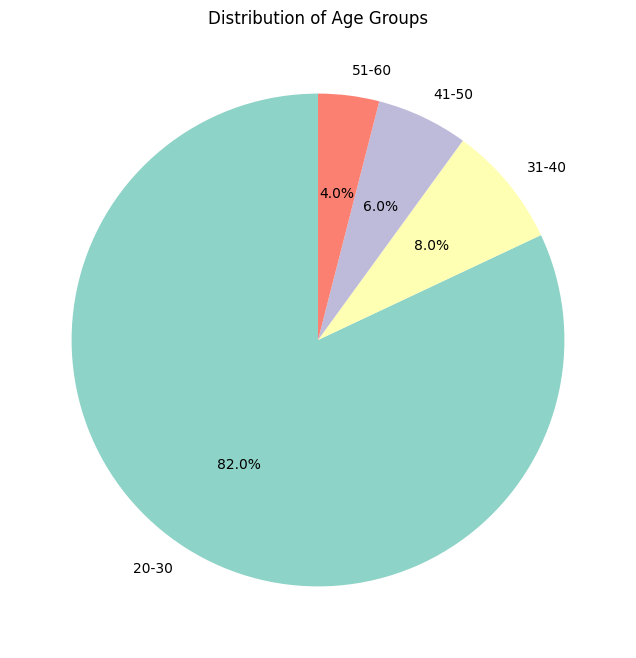

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('../data/cleaned_data.csv')

age_group_counts = df['Age group'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Distribution of Age Groups')
plt.show()


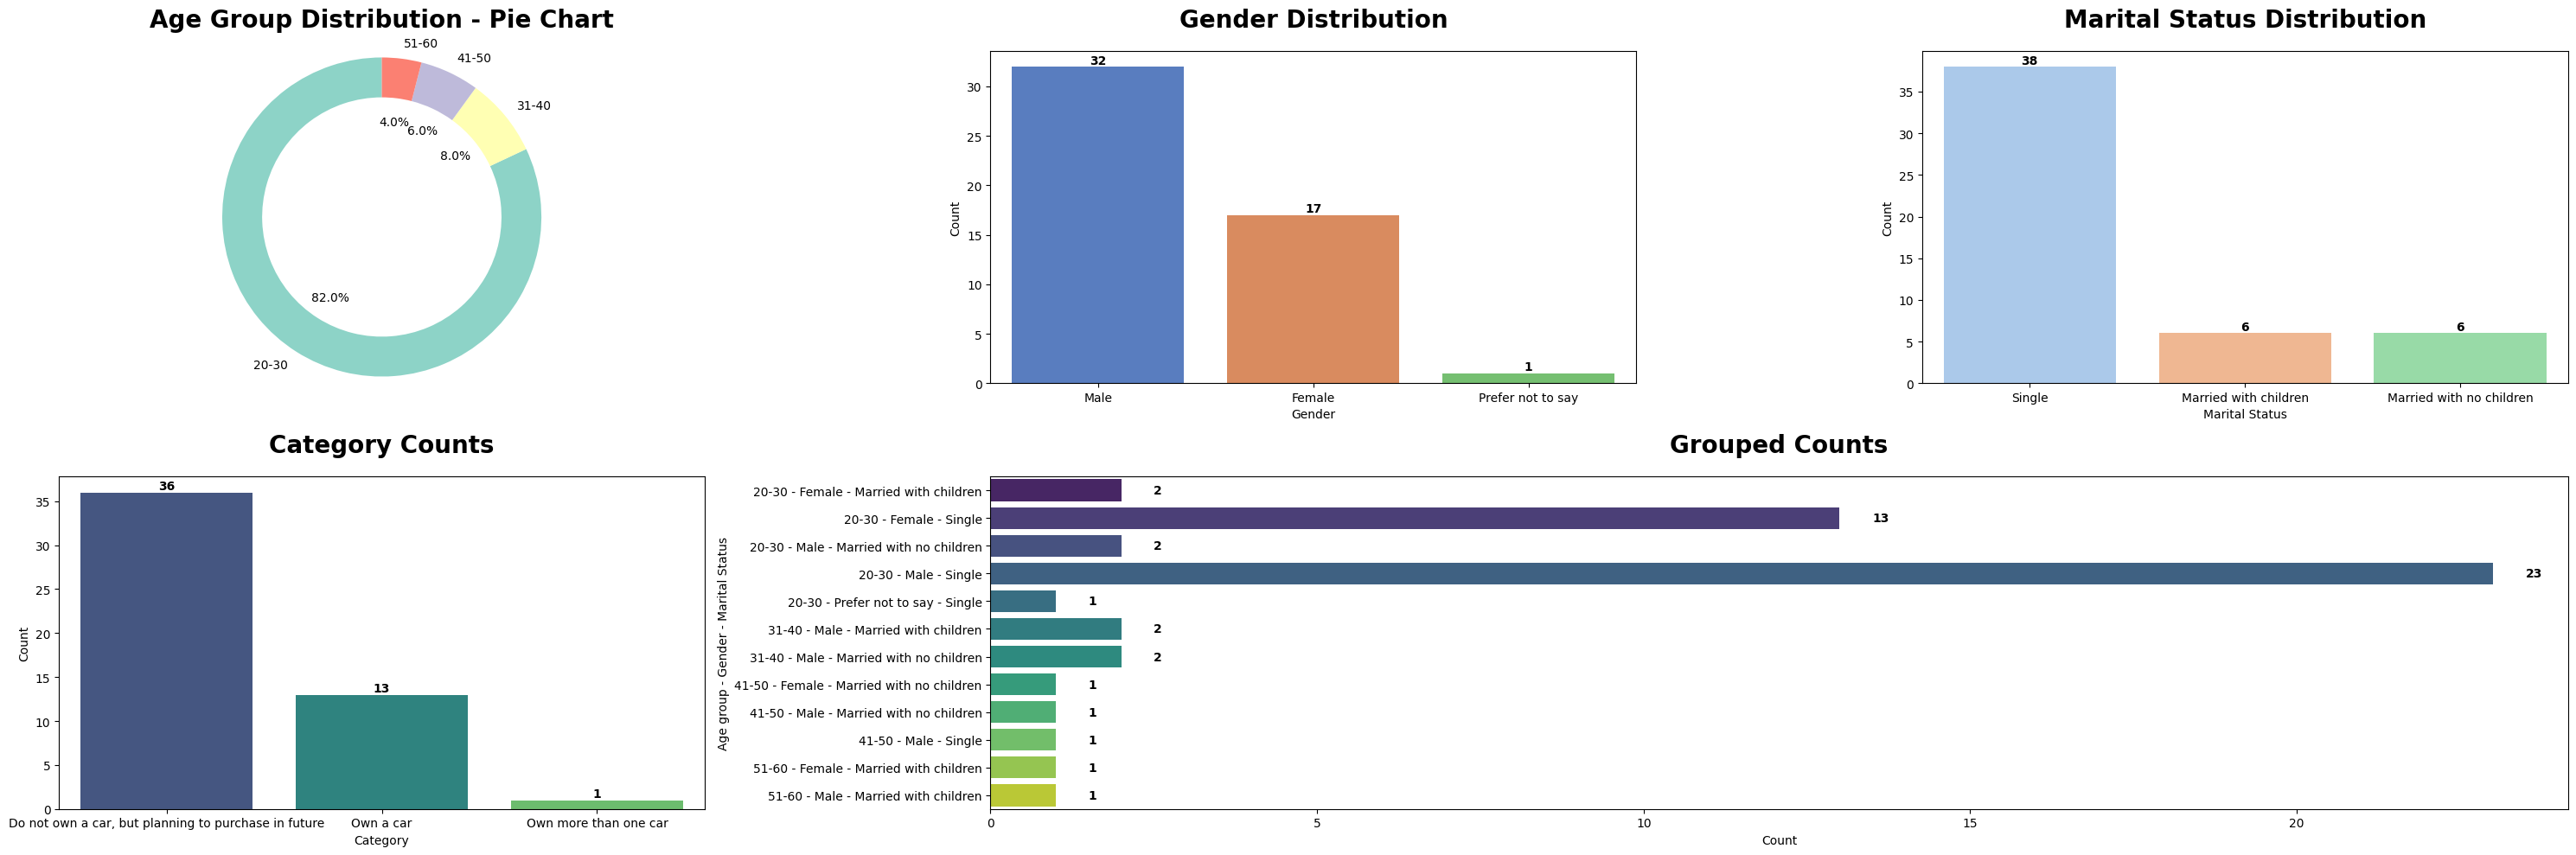

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib import gridspec

warnings.filterwarnings('ignore')


age_group_counts = df['Age group'].value_counts()
gender_counts = df['Gender'].value_counts()
marital_status_counts = df['Marital status'].value_counts()
category_counts = df['Category'].value_counts()

fig = plt.figure(figsize=(30, 10))  

gs = gridspec.GridSpec(2, 3)  # nrows, ncols

ax1 = plt.subplot(gs[0, 0])  # First subplot in the first row
ax2 = plt.subplot(gs[0, 1])  # Second subplot in the first row
ax3 = plt.subplot(gs[0, 2])  # Third subplot in the first row
ax4 = plt.subplot(gs[1, 0])  # The first subplot in the second row
ax5 = plt.subplot(gs[1, 1:])  # The last subplot spans across all columns in the second row

# Age Group Distribution
colors = plt.cm.Set3.colors
ax1.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3), radius=1.2)
ax1.set_title('Age Group Distribution - Pie Chart', loc='center', pad=20, fontsize=20, fontweight='bold')

# Gender Distribution
sns.barplot(x=gender_counts.index, y=gender_counts, palette='muted', ax=ax2)
ax2.set_title('Gender Distribution', loc='center', pad=20, fontsize=20, fontweight='bold')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')
for i, count in enumerate(gender_counts):
    ax2.text(i, count + 0.05, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Marital Status Distribution
sns.barplot(x=marital_status_counts.index, y=marital_status_counts, palette='pastel', ax=ax3)
ax3.set_title('Marital Status Distribution', loc='center', pad=20, fontsize=20, fontweight='bold')
ax3.set_xlabel('Marital Status')
ax3.set_ylabel('Count')
for i, count in enumerate(marital_status_counts):
    ax3.text(i, count + 0.05, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')


# Category Counts
sns.barplot(x=category_counts.index, y=category_counts, palette='viridis', ax=ax4)
ax4.set_title('Category Counts', loc='center', pad=20, fontsize=20, fontweight='bold')
ax4.set_xlabel('Category')
ax4.set_ylabel('Count')
for i, count in enumerate(category_counts):
    ax4.text(i, count + 0.05, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Grouped Counts
grouped_counts = df.groupby(['Age group', 'Gender', 'Marital status']).size().reset_index(name='Count')
sns.barplot(x='Count', y=grouped_counts['Age group'] + ' - ' + grouped_counts['Gender'] + ' - ' + grouped_counts['Marital status'],
            data=grouped_counts, palette='viridis', ax=ax5)
ax5.set_title('Grouped Counts', loc='center', pad=20, fontsize=20, fontweight='bold')
ax5.set_xlabel('Count')
ax5.set_ylabel('Age group - Gender - Marital Status')
for index, row in grouped_counts.iterrows():
    ax5.text(row['Count']+0.5, index, row['Count'], color='black', ha="left", va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## **Budget to number of car parts (int + ext) respondent want to customise** ##

In [4]:
df = pd.read_csv('../data/cleaned_data.csv')
count_by_value = df['Customisation Budget'].value_counts()
print(count_by_value)
print(df['Customisation Budget'].unique())
print(df['Personalisation Budget'].unique())

Customisation Budget
500-1000     19
under 500    14
over 1000    11
0             6
Name: count, dtype: int64
['under 500' '500-1000' 'over 1000' '0']
['500-1000' 'under 500' 'over 1000' '0']


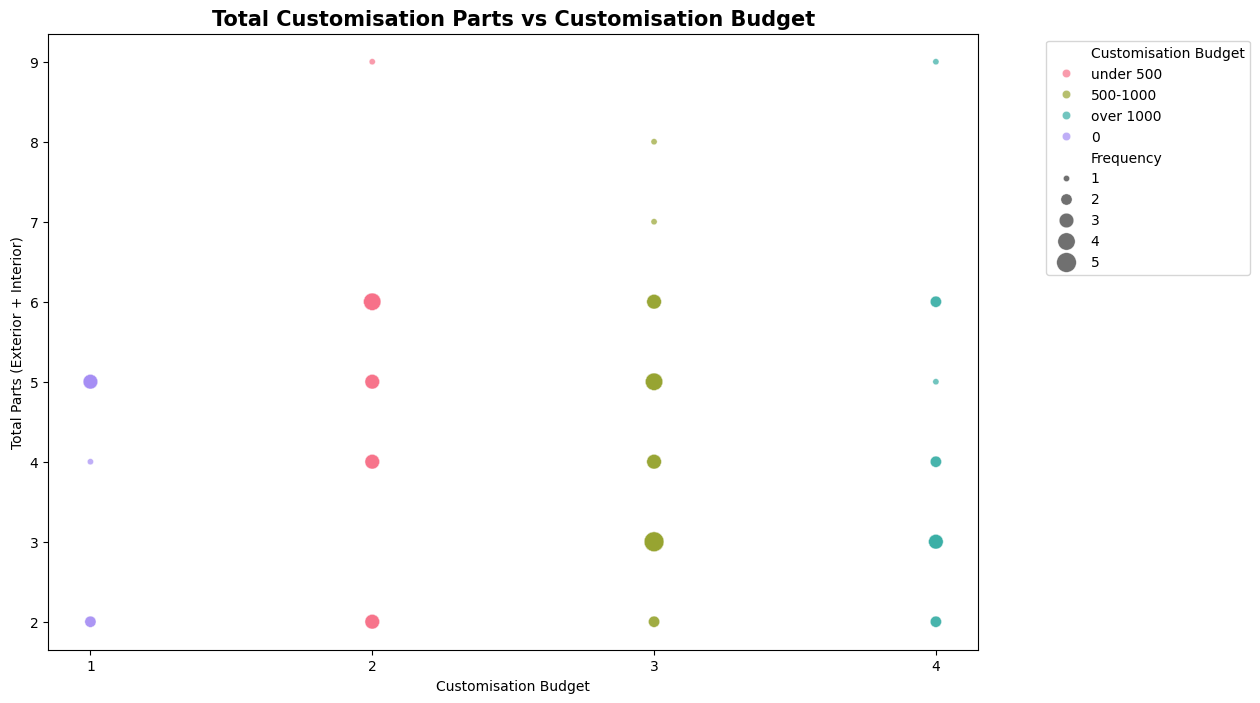

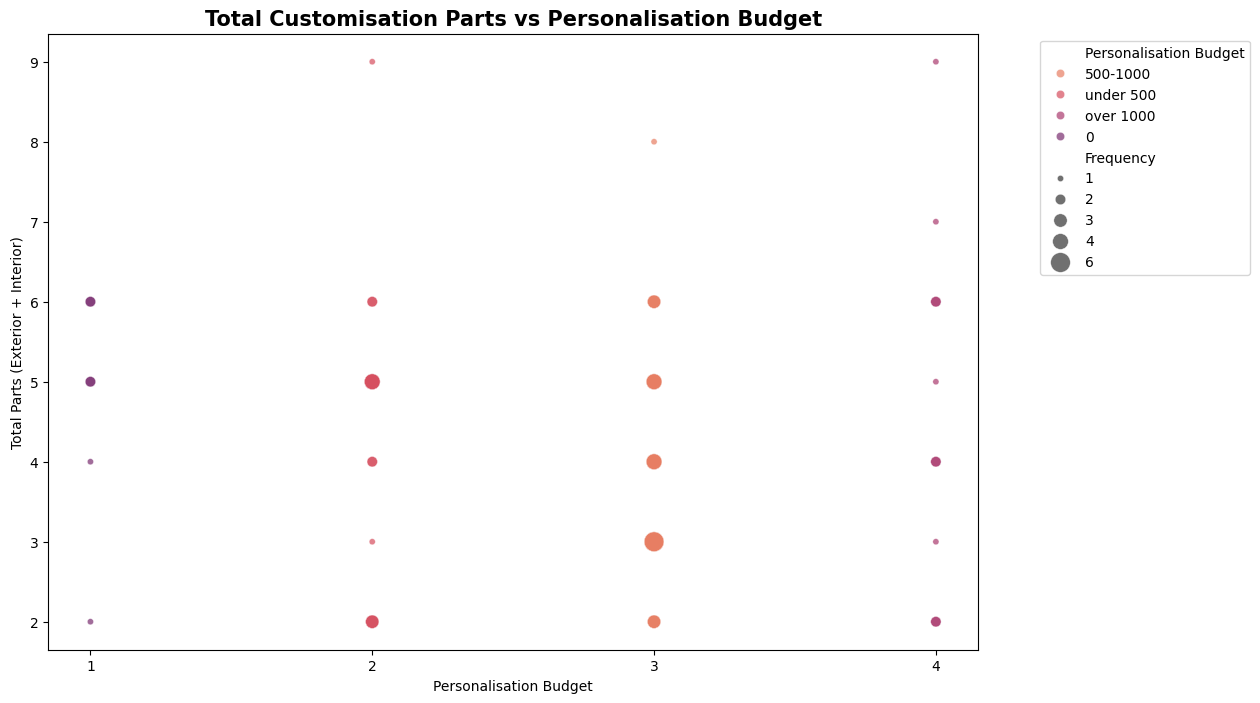

In [5]:
import pandas as pd

# Sample data
df = pd.read_csv('../data/cleaned_data.csv')

df = df[['Exterior components to customise', 'Interior components to customise', 'Customisation Budget', 'Personalisation Budget', 'Customisation Budget Ordinal', 'Personalisation Budget Ordinal']]

# Mapping dictionary
budget_mapping = {'0': 1, 'under 500': 2, '500-1000': 3, 'over 1000': 4}

# # Apply the mapping to the 'Customisation Budget' column
# df['Customisation Budget Ordinal'] = df['Customisation Budget'].map(budget_mapping)
# df['Personalisation Budget Ordinal'] = df['Personalisation Budget'].map(budget_mapping)

df['TOTAL PARTS'] = df.apply(lambda row: len(row['Exterior components to customise'].split(';')) + len(row['Interior components to customise'].split(';')), axis=1)

df['Frequency'] = df.groupby(['Customisation Budget', 'TOTAL PARTS'])['Customisation Budget Ordinal'].transform('count')

plt.figure(figsize=(12, 8))
plot = sns.scatterplot(y='TOTAL PARTS', x='Customisation Budget Ordinal', data=df, hue='Customisation Budget', 
                       palette='husl', size='Frequency', sizes=(20, 200), alpha=0.7)

plt.xticks(range(1, len(budget_mapping) + 1), budget_mapping.values())

plt.title('Total Customisation Parts vs Customisation Budget', fontsize=15, fontweight='bold')
plt.ylabel('Total Parts (Exterior + Interior)')
plt.xlabel('Customisation Budget')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

# Preparing for the next plot
df['Frequency'] = df.groupby(['Personalisation Budget Ordinal', 'TOTAL PARTS'])['Personalisation Budget'].transform('count')

plt.figure(figsize=(12, 8))
plot = sns.scatterplot(y='TOTAL PARTS', x='Personalisation Budget Ordinal', data=df, hue='Personalisation Budget', 
                       palette='flare', size='Frequency', sizes=(20, 200), alpha=0.7)

plt.xticks(range(1, len(budget_mapping) + 1), budget_mapping.values())
plt.title('Total Customisation Parts vs Personalisation Budget', fontsize=15, fontweight='bold')
plt.ylabel('Total Parts (Exterior + Interior)')
plt.xlabel('Personalisation Budget')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

## **<u>ANALYSIS</u>**

- No real correlation between budget and number of car parts to customise as people with lower budget still choose to customise multiple parts
- This survey question is probably to check what are the car parts that customer are interested in customising and has no response has no correlation with budget

<br>

In [8]:
df = pd.read_csv('../data/cleaned_data.csv')

df['TOTAL PARTS'] = df.apply(lambda row: len(row['Exterior components to customise'].split(';')) + len(row['Interior components to customise'].split(';')), axis=1)
df['TOTAL PARTS'].unique()

array([2, 5, 6, 9, 4, 3, 8, 7], dtype=int64)

In [9]:
df['Any cadding experience'].unique

array(['No, I would need a designer to model my sketch',
       'Yes, I can design on my own'], dtype=object)

## **Customer with CAD EXPERIENCE and total number of car parts they are interested in customising** ##

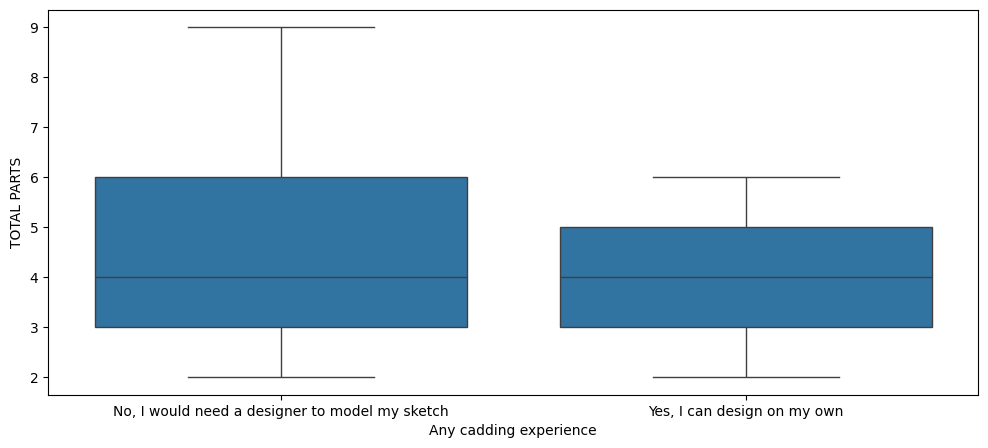

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.boxplot(x='Any cadding experience', y='TOTAL PARTS', data=df)
plt.show()


In [15]:
from scipy.stats import ttest_ind

experienced = df[df['Any cadding experience'] == 'Yes, I can design on my own']['TOTAL PARTS']
inexperienced = df[df['Any cadding experience'] == 'No, I would need a designer to model my sketch']['TOTAL PARTS']

t_stat, p_value = ttest_ind(experienced, inexperienced, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: -1.2703591362227942
P-Value: 0.21070651698317316


## **<u>ANALYSIS</u>**

- People with CAD experience are more likely to customise 3-5 parts (25th-75th percentile) with max of only 6 parts
- People opting for designer have greater deviations in the number of parts they want to customise with a max of 9 parts
- Both groups have a similar median of 4 parts

<br>

### CHATGPT's answer ###
In the context of a t-test, the t-statistic and p-value are used to assess whether the means of two groups are significantly different. Let's interpret the values you provided:

T-Statistic: -1.2703591362227942

The t-statistic measures how many standard deviations the sample mean (difference between the two groups) is from the null hypothesis mean (assuming no difference). <br>In this case, a negative t-statistic indicates that the sample mean of the first group is lower than the sample mean of the second group.
P-Value: 0.21070651698317316

The p-value is the probability of observing a t-statistic as extreme as the one computed from your sample, assuming the null hypothesis is true (i.e., assuming there <br>is no significant difference between the groups).
In this case, a p-value of 0.2107 means that, under the null hypothesis, there is a 21.07% chance of observing a t-statistic <br>as extreme as the one calculated.
Interpretation:

A high p-value (greater than the common significance level of 0.05) suggests that you do not have enough evidence to reject the null hypothesis. In practical terms, <br>you don't have sufficient statistical evidence to claim that there is a significant difference between the groups.

The negative t-statistic and the high p-value together suggest that the observed difference between the two groups may be due to random variability, and there is no <br>strong evidence to support the idea that the means of the two groups are significantly different.